# 第14、15题

## 14. Constrained Nonlinear Optimization
### (a)
We need to solve the optimization problem.
\begin{align}
\min_x\, & 10-x_1^2-x_2^2,\\
\text{subject to }& x_2\geq x_1^2,\\
& x_1 + x_2 = 0
\end{align}

We define Lagrangian
\begin{equation}
L(x_1,x_2,\alpha,\beta) = 10-x_1^2-x_2^2 + \alpha (x_1^2 - x_2) + \beta(x_1 + x_2).
\end{equation}
Then we have
\begin{equation}
\begin{cases}
\nabla_{x_1}L(x_1,x_2,\alpha,\beta) = -2x_1 + 2\alpha x_1 + \beta = 0,\\
\nabla_{x_2}L(x_1,x_2,\alpha,\beta) = -2x_2 - \alpha + \beta = 0,\\
\nabla_{\alpha}L(x_1,x_2,\alpha,\beta) = x_1^2 - x_2 = 0,\\
\nabla_{\beta}L(x_1,x_2,\alpha,\beta) = x_1 + x_2 = 0.
\end{cases}
\end{equation}
By solving the equations above, we have
\begin{equation}
\begin{cases}
x_1 = -1,\\
x_2 = 1,
\end{cases}
\text{ or }
\begin{cases}
x_1 = 0,\\
x_2 = 0.
\end{cases}
\end{equation}
By verifying the solutions, we know that
\begin{equation}
\begin{cases}
x_1 = -1\\
x_2 = 1
\end{cases}
\end{equation}
is the final answer to the optimization problem.

### (b)

In [1]:
# Importing the package we need
import numpy as np
from scipy.optimize import minimize

In [2]:
# Defining our object function
def obj(x):
    return 10 - x[0]**2 - x[1]**2

# Defining Linear Constraints
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([1,1], 0, 0)

# Defining Nonlinear Constraints
def cons_f(x):
    return x[0]**2 - x[1]


from scipy.optimize import NonlinearConstraint
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 0)

In [3]:
# Setting the initial point
x0 = np.array([0.1, 0.1])
# Solving the optimization problem
res = minimize(obj, x0, method='trust-constr', tol=1e-16,
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1})

`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 45, CG iterations: 14, optimality: 0.00e+00, constraint violation: 0.00e+00, execution time: 0.047 s.


In [4]:
print(res.x)

[-0.99999994  0.99999994]


## 15. Ridge Regression with Different Lambda

In [5]:
## Generating Datasets
mu = 0
sigma = 0.3
noise = np.zeros((100,25))
for i in range(100):
    noise[i,:] = np.random.normal(mu, sigma, 25)

In [6]:
X = [0.041*i for i in range(0,25)]
x = np.array([X for j in range(0,100)])

In [7]:
def ground_truth(x):
    """ function to approximate by polynomial interpolation"""
    return np.sin(2*np.pi*x)

# Calculating y
gdtt_y = ground_truth(x)
y = gdtt_y + noise

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

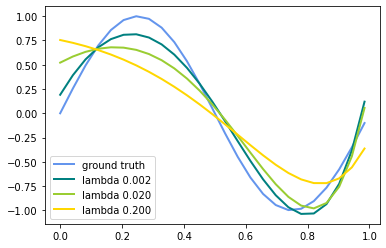

In [9]:
degree = 7 # 7th-order polynomial
lambda_ = [0.002,0.02,0.2] # Different Lambda
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(X, ground_truth(np.array(X)), color='cornflowerblue', linewidth=lw,
         label="ground truth")

X = np.array(X)
X = X[:, np.newaxis]


for count in range(0,3):
    y_plot = []
    for i in range(0,y.shape[0]):
        model = make_pipeline(PolynomialFeatures(degree), Ridge(lambda_[count]))
        model.fit(X, y[i,:])
        y_plot.append(model.predict(X))
    Y = np.mean(np.array(y_plot),axis = 0)
    plt.plot(X, Y, color=colors[count], linewidth=lw,
                 label="lambda %.3f" % lambda_[count])

plt.legend(loc='lower left')

plt.show()